 # PUT GAP 

## INTRODUCTION 

Les options gap sont des options exotiques permettant de valoriser des projets et des flux financiers lorsque l’on intègre dans le calcul le versement de l’option un prix d’exercice différent du prix d’exercice k utilisé dans une option standard (soit K1 > K ou K1 < K). Cela signifie que le payoff se déclenche lorsque le sous-jacent excède ou est en deçà d’un prix d’exercice K1 différent du prix d’exercice K.  

En effet, cela ressemble à de la franchise dans l’univers de l’assurance. Par exemple après un sinistre, l’assuré ne reçoit pas la totalité du montant assuré mais ce montant moins la franchise. De la même façon, un assuré déclenche son droit à être indemnisé du sinistre si le montant des dommages est supérieur à la franchise.

Afin de valoriser ces options, il nous suffit de compléter les formules de base du modèle de Black et Scholes qui permet de valoriser les options européennes qui reposent sur un sous-jacent qui verse un revenu en intégrant une différenciation au niveau des prix d’exercice.

Un put gap est donc un put européen avec un payoff de K1 − ST lorsque K > ST . Pour analyser le put gap européen qui nous est assigné ici et pouvoir apporter une réponse satisfaisante, nous importerons d’abord les packages nécessaires pour la réalisation du projet. Ensuite, nous définirons notre environnement de travail puis importerons notre base de données. Ayant les outils nécessaires sous la main, nous pourrons passer à l’étude.

## REALISATION DU TRAVAIL DEMANDE 

### Partie 0 : Préliminiaires (import des packages, environnement de travail,  données)

### Etape 1 : Import des packages nécesaires à la réalisation du travail

In [5]:
import numpy as np # Manipuler des matrices ou tableaux multidimensionnels, fonctions mathématiques 
import os          # Changer le répertoire dans lequel nous exécutons actuellement notre code Python
import matplotlib.pyplot as plt # ajouter des lignes, des images ou des textes aux axes d'un graphique
import time        # Manipuler le temps dans un programme. 
import numba       # Rendre plus performantes des portions de nos programmes.  

from pandas import DataFrame # Manipulation et l'analyse des données, tableaux numériques et de séries temporelles.
from scipy.sparse import csc_matrix # Calcul numérique haut niveau
from scipy.stats import bernoulli   # Calcul numérique haut niveau
from scipy.stats import norm        # Calcul numérique haut niveau
from math import log, sqrt, exp # Calculs mathématiques 

%matplotlib inline

#### Installation de opstrat pour les graphiques

In [6]:
 pip install opstrat 

Note: you may need to restart the kernel to use updated packages.


In [7]:
import opstrat as op

Pour la suite de notre travail, nous travaillerons avec comme volatilité = 0.09 pour K = 100 à 6 mois 

## Partie 1 : Ecriture, représentation de la fonction de payoff : avec les cas K1 > K et K1 < K 

### Etape 1 : Calcul des payoffs

In [ ]:
Nous Choisissons ici des valeurs réelles prises par ces différents paramètres afin de passer au calcul 

In [8]:
# les paramètres à utiliser pour l'exercice 
K1  =120              # le prix d'exercice du déclenchement de l'option
K   =110              # le prix d'exercice de l'option d'origine 
K1  =100              # le prix d'exercice du déclenchement de l'option
S   =110              # valeur initiale du cours du sous-jacent
r   =0.05             # le taux d'intérêt sans risque 
t   =0.5              # échéance de l'option en année 
q   =0                # le revenu versé (ici supposé nul)
sigma =0.09           # la volatilité du prix de l'action
#N(.)                 # la fonction de répartition de la loi normale
     

### Etape 2 : Représentation graphique des payoffs  

### CAS 1 : K1 > K 

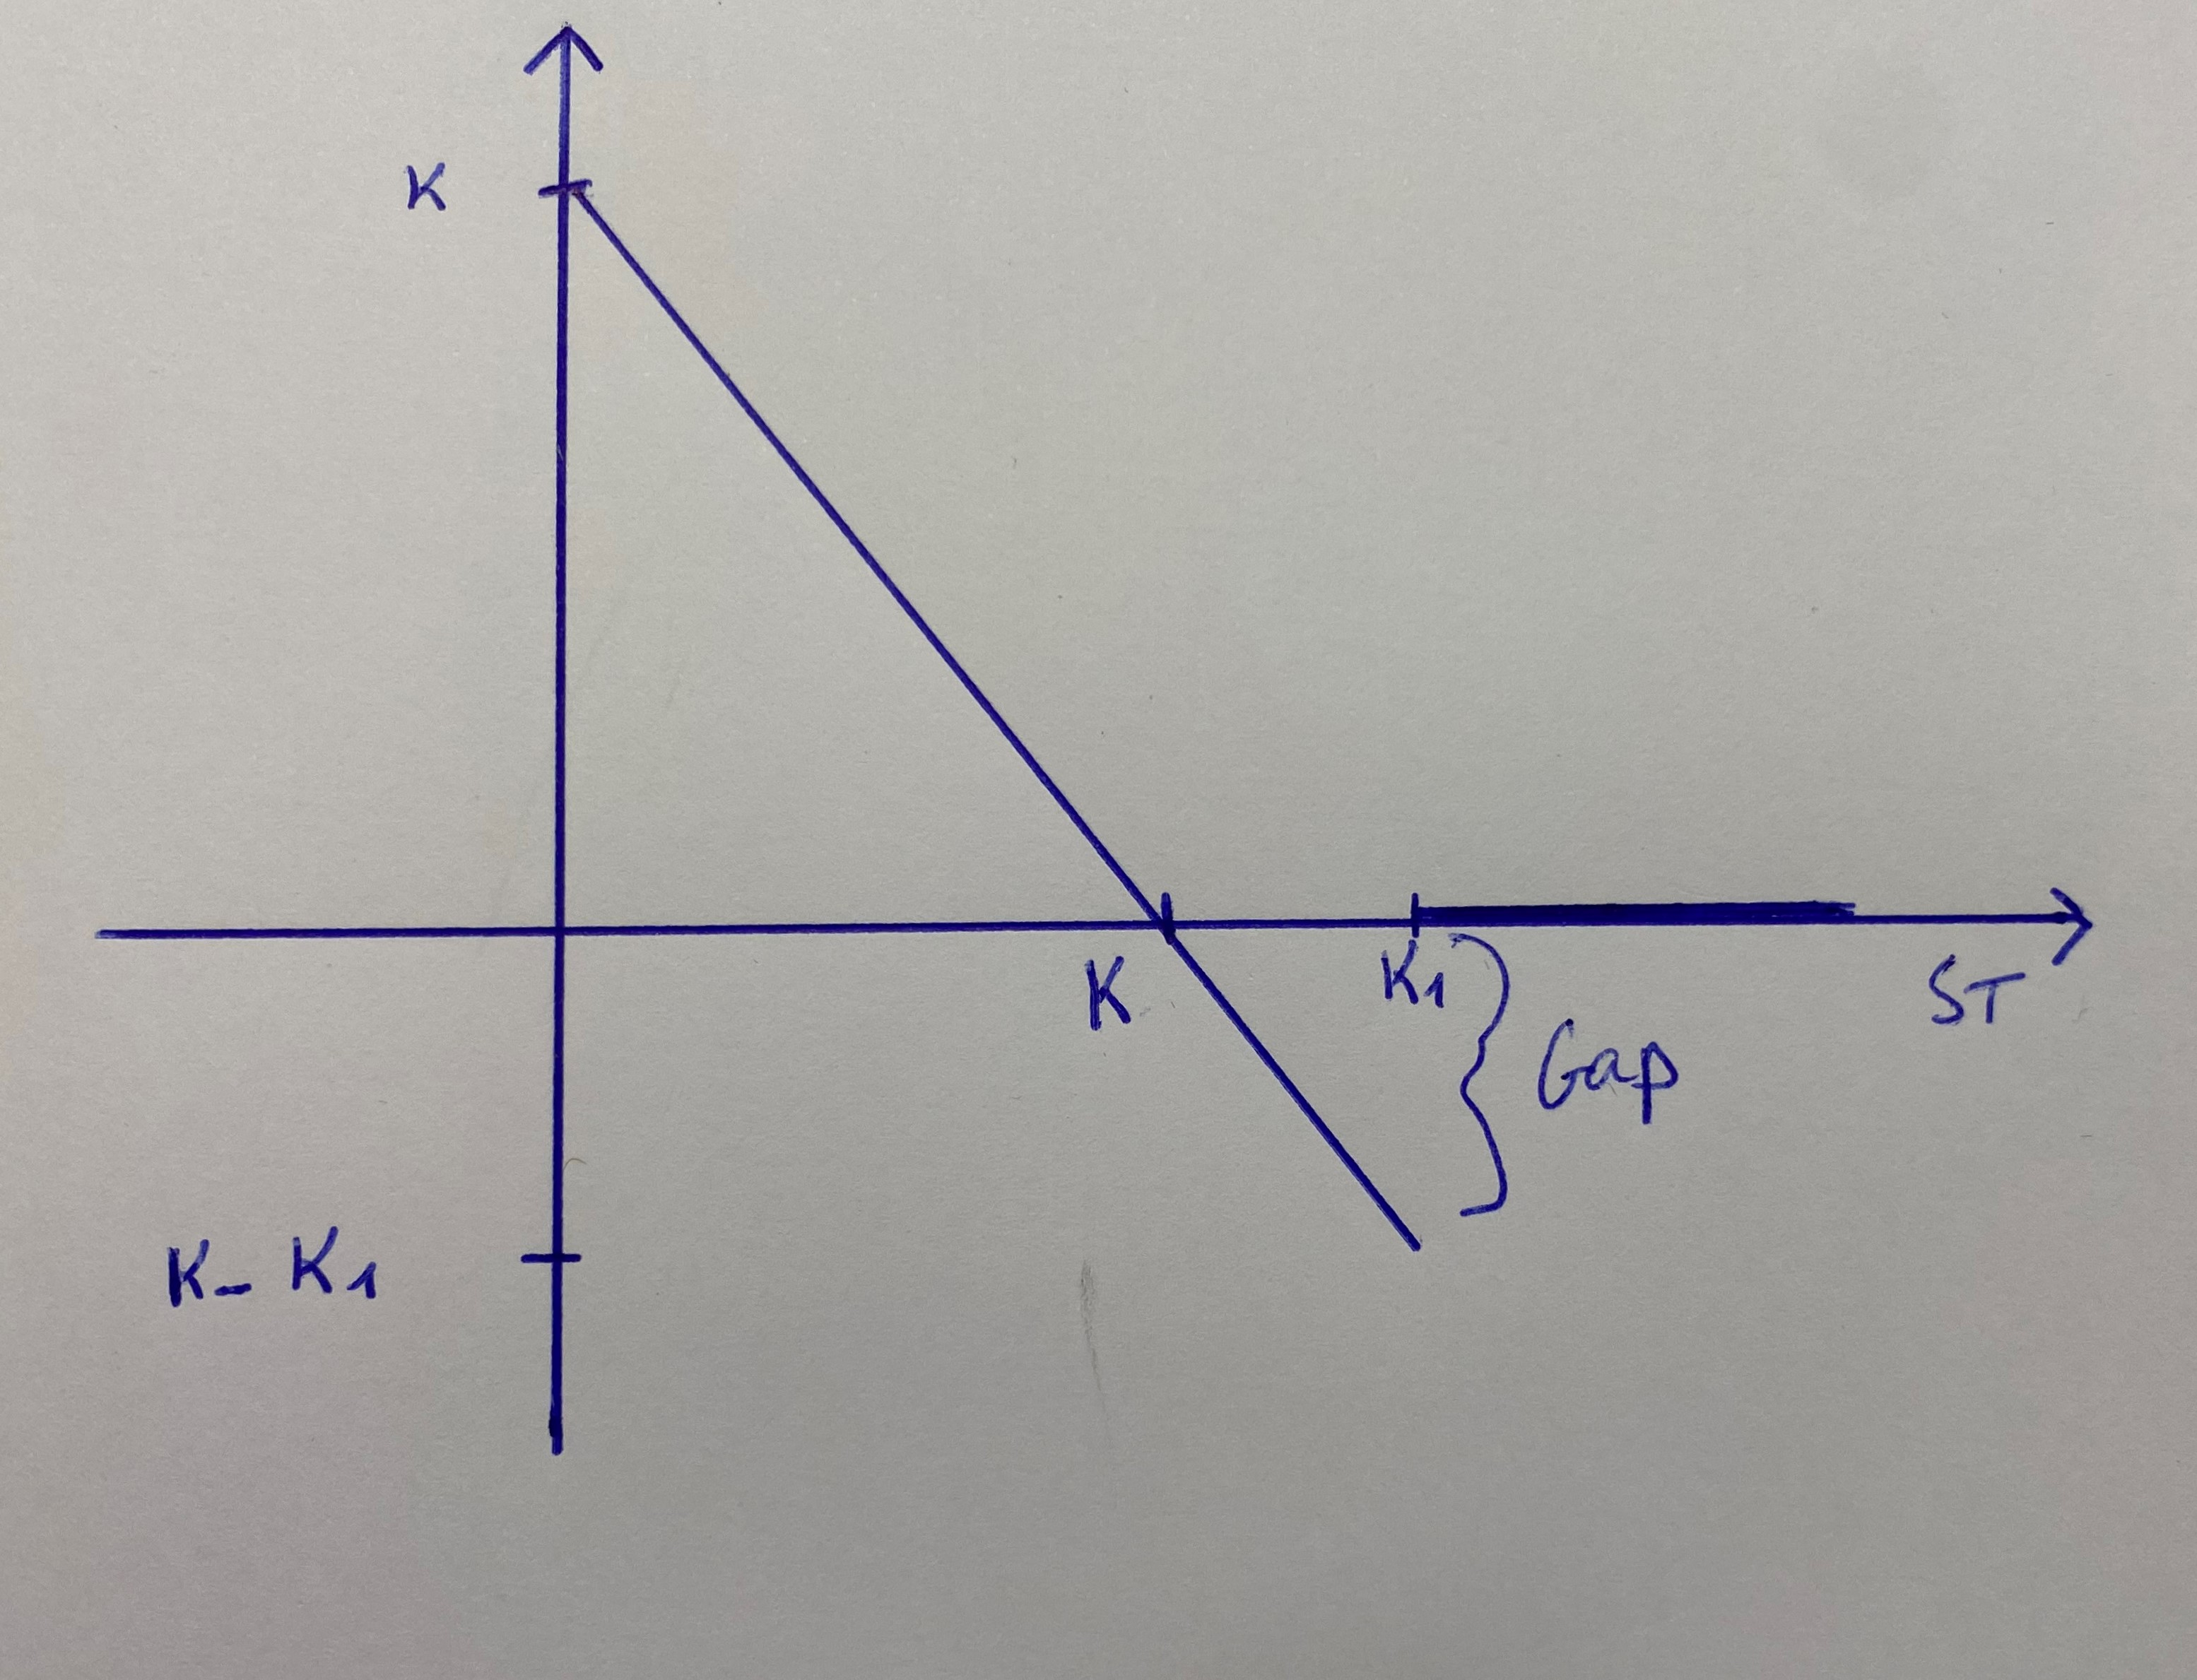

### CAS 2 : K1 < K et 

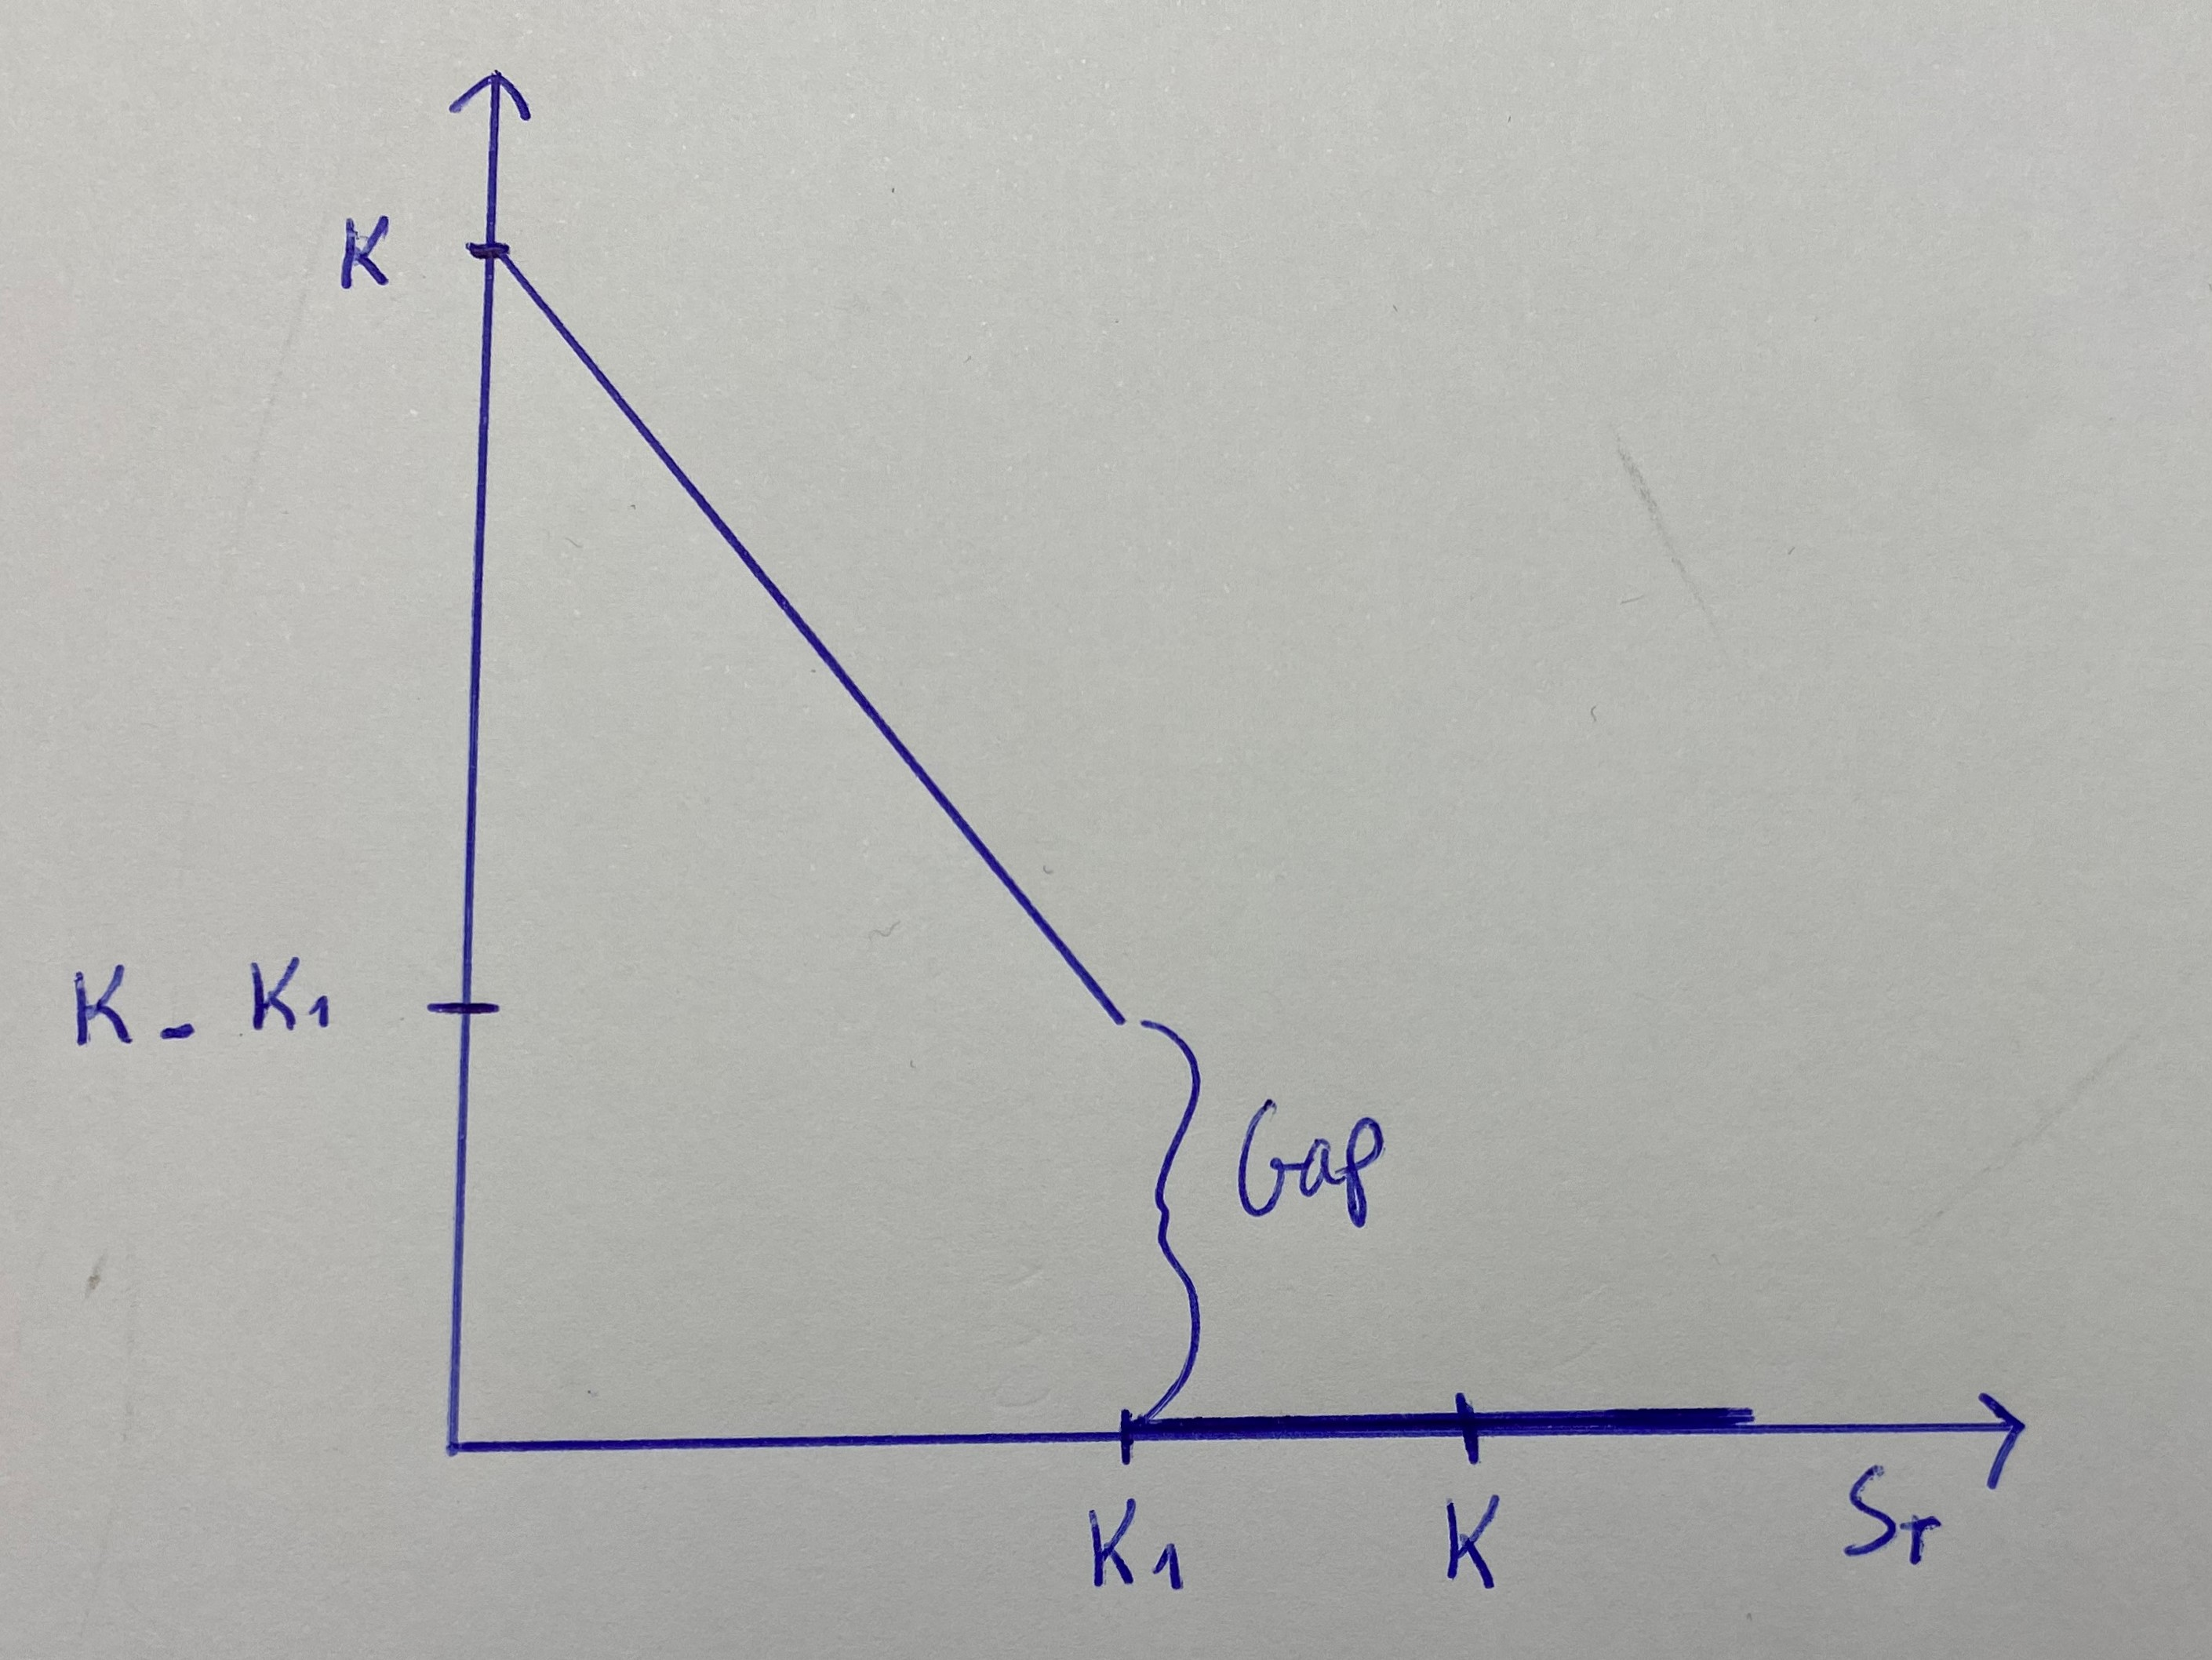

## Partie 2 : Construiction des arbres binomiaux à six périodes (six mois) et détermination de la couverture delta-neutre (delta-hedge) !

Voilà ce à quoi ressemblera notre arbre. Seulement que nous le ferons à 6 périodes nous.

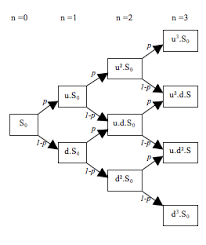

### Arbres binomiaux à six périodes 

In [9]:
# Nous définissons d'abord les paramètres avec lesquels nous travaillerons 
    
N   = 6                          # le nombre de période 
t   = 0.5                        # échéance de l'option en année 
dt  = t / (N)                    # avec t le delta 
K   = 120                        # le prix d'exercice de l'option d'origine 
S0  = 110                        # valeur initiale du cours du sous-jacent
r   = 0.05                       # le taux d'intérêt sans risque 
q   = 0                          # le revenu versé (ici supposé nul)
t   = 0.5                        # échéance en année 
p   = 0.6                        # la probabilité d'un mouvement up
sigma = 0.2                      # sigma représente la volatilité  

In [10]:
# Calcul des paramètres u, p, d, dt
u   = np.exp(sigma*np.sqrt(t))    # est la probabilité risque neutre de hausse du cours de l'actif support du contrat d'option
d   = 1/u                         # est la probabilité risque neutre de baisse du cours de l'actif support du contrat d'option
p   = (np.exp(r*t)-d)/(u-d)       # probabilité que s0 augmente  

print("la probabilité risque neutre de hausse du cours est de", u)
print("la probabilité risque neutre de baisse du cours est de", d)
print("la probabilité (p) d'un mouvement up est de" ,p)
print("delta t est de",dt)

la probabilité risque neutre de hausse du cours est de 1.151909910168909
la probabilité risque neutre de baisse du cours est de 0.8681234453945849
la probabilité (p) d'un mouvement up est de 0.5539082889483392
delta t est de 0.08333333333333333


In [11]:
# Calcul des paramètres S_u, S_d, c

S_u = u*S0                       # valeur de l'action à l'échéance lorsque le cours est à la hausse (pourcentage) 
S_d = d*S0                       # valeur de l'action à l'échéance lorsque le cours est à la baisse (pourcentage)
C_u = K-S_u                      # payoff du put 
C_d = 0                          # valeur max quand le payoff du put est négatif
c = np.exp(-r*t)*(p*C_u +(1-p)*C_d) # la valeur actuelle du  put (option) à t=0


print("la valeur de l'action à l'échéance lorsque le cours est à la hausse est de",S_u)  
print("la valeur de l'action à l'échéance lorsque le cours est à la baisse est de",S_d)
print("la valeur actuelle du  put (option) à t=0 est de", c)

la valeur de l'action à l'échéance lorsque le cours est à la hausse est de 126.71009011857998
la valeur de l'action à l'échéance lorsque le cours est à la baisse est de 95.49357899340434
la valeur actuelle du  put (option) à t=0 est de -3.625007046000394


In [12]:


def binomial_tree_putgap(N, T, S0, sigma, r, K, array_out = False ) :
    # int
    dt = T / (N)
    u  = np.exp(sigma*np.sqrt(dt))       
    d  = 1/u                             
    p  = (np.exp(r*t)-d)/(u-d)  
    
    # price tree (calculate the stock price)

    price_tree = np.zeros([N+1, N+1]) 

    for i in range (N+1):
        for j in range (i+1):
            price_tree[j, i] = S0*(d**j)*(u**(i-j)) 
        
    # valeur de l'option 

    option_putgap = np.zeros([N+1, N+1])
    option_putgap[:,N] = np.maximum(np.zeros(N+1), K-price_tree[:,N])
    
    #calcul du prix de l'option à t=0

    for i in np.arange(N-1, -1, -1):
        for j in np.arange(0, i+1):        
            option_putgap[j, i] = np.exp(-r*dt)*(p*option_putgap[j, i+1]+(1-p)*option_putgap[j+1, i+1])
            
    # return 
    if array_out :
        return [option_putgap[0, 0], price_tree, option_putgap]
    else :
        return option_putgap[0,0]
        

Nous utilisons np.zeros() afin que cette fonction renvoie un nouveau tableau de forme et de type donnés, avec des zéros. Dans ce tableau sera stocké nos calculs qui remplaceront les zeros plus tard. 


In [13]:
# les données sont rassemblées donc nous passons à la construction de l'arbre binomial à 6 périodes
#binomial_tree_putgap(N=6, T=0.5, S0=110, sigma=0.09, r=0.05, K=120)
arbre_a_6periodes = binomial_tree_putgap(6, 0.5, 110, 0.20, 0.05, 120, True )
arbre_a_6periodes

[3.3034017813878993,
 array([[110.        , 116.53776607, 123.46409927, 130.8020938 ,
         138.57621644, 146.81238812, 155.53807039],
        [  0.        , 103.82900246, 110.        , 116.53776607,
         123.46409927, 130.8020938 , 138.57621644],
        [  0.        ,   0.        ,  98.00419775, 103.82900246,
         110.        , 116.53776607, 123.46409927],
        [  0.        ,   0.        ,   0.        ,  92.50616445,
          98.00419775, 103.82900246, 110.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ,
          87.3165707 ,  92.50616445,  98.00419775],
        [  0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,  82.41811304,  87.3165707 ],
        [  0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,  77.79445874]]),
 array([[ 3.30340178,  1.90177334,  0.87849799,  0.25435062,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  6.69467565,  4.37040328, 

In [14]:
start_time = time.time()
for i in range (1000):
    binomial_tree_putgap(6, 0.5, 110, 0.2, 0.05, 120, True )
    end_time = time.time()
print(end_time-start_time)

0.10227489471435547


In [15]:
start_time = time.time()
for i in range (1000):
    binomial_tree_putgap(6, 0.5, 110, 0.2, 0.05, 120, True )
    end_time = time.time()
print(end_time-start_time)

0.09758877754211426


#### CALCUL DU DELTA NEUTRE (DELTA HEDGE)

In [16]:

    # pour commencer, nous définissons d'abord les formules de calcul de d1 et d2 
    


    def d1_calc(N, t, S0, sigma, r, K):
        return (np.log(S0/K) + (r+ 0.5*sigma**2)*t)/(sigma*np.sqrt(t))
    def d2_calc(N, t, S0, sigma, r, K, T):
        return d1_calc(N, t, S0, sigma, r, K)-sigma*np.sqrt(t)
    
    # Ensuite définissons ici le call option price function

    def gap_call(N, t, S0, sigma, r, K): #( NB: pas besoin du gap_call dans cet exercice, nous l'avons présenté juste pour notre propre culture)
        d1 = d1_calc(N, t, S0, sigma, r, K)
        d2 = d1-sigma*np.sqrt(t)
        return S0*norm.cdf(d1)-K * np.exp(-r*t)*norm.cdf(d2)
    
     # comme précédemment, nous définissons ici le put option price function
    
    def gap_put(N, t, S0, sigma, r, K):
        return gap_call(N, t, S0, sigma, r, K) - S0 + np.exp(-r*(t))*K
              
    
    # Calcul de delta hedge
    
    def delta(N, t, S0, sigma, r, K, otype):
        d1 = d1_calc(N, t, S0, sigma, r, K)
        d2 = d1-sigma*np.sqrt(t)
        
        if(otype == "call"):
            delta = np.exp(-(t))*norm.cdf(d1)
        elif(otype == "put"):
            delta = -norm.cdf(-d1)
        return delta  


In [17]:
N = 6
t=0.5
S0=110
sigma=0.2
r=0.05
K=120

otype ="put"
#print(gap_call(N, t, S0, sigma, r, K))   (pas besoin du gap_call dans cet exercice, nous l'avons présenté juste pour notre propre culture)
print(gap_put(N, t, S0, sigma, r, K))
print(delta(N, t, S0, sigma, r, K, otype))

10.522136957072078
-0.6434798572179589


Couvrir le delta hedge consiste à prendre une position opposée sur le sous-jacent en quantité afin de constituer un portefeuille neutre.
La valeur mark-to-market d'un tel portefeuille est alors immunisée contre les petites variations du sous-jacent. 

In [19]:
# Méthode de couverture 
ST = 111
# valeur du putjgap 
valeur_put_2 =gap_put(N, t, S0, sigma, r, K) + delta(N, t, S0, sigma, r, K, otype)*(ST-S0)
print(" la valeur du put est de" ,valeur_put_2)

 la valeur du put est de 9.87865709985412


Pour couvrir le delta de notre position longue de 1000 put sur danone par exemple, il faut prendre une position courte sur n actions.

In [73]:
int(delta(N, t, S0, sigma, r, K, otype))


0

In [74]:

stock_Call_a_payer = delta_arrondi*1000
stock_Call_a_payer 

-643.0

In [69]:
a=(gap_put(N, t, S0, sigma, r, K)-valeur_put_2)*1000
round(a,0)

643.0

In [70]:
b=(stock_Call_a_payer*(ST-S0))
round(b)

-643

In [71]:
# la valeur du portefeuille est de 
valeur_portefeuille = a+b
valeur_portefeuille     

0.479857217958056

Nous savons que Delta mesure la sensibilité de la prime d'une option par rapport au prix du sous-jacent. 

### Évaluation du prix de l'option par une méthode de Monte-Carlo 

### Simulation de Monte Carlo

In [16]:
S0 = 120
K1 = 120
K=110
K2 = 100
r = 0.05
sigma = 0.20
T = 0.5
N = 252
dt = T / N
j=100000
discount_factor = np.exp(-r * T)


In [17]:
# Mouvement brownien géométrique 
def gen_paths(S0, r, sigma, T, M, I):
    dt = float(T) / M
    paths = np.zeros((M + 1, I), np.float64)
    paths[0] = S0
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * rand)
    return paths

In [18]:
# Le prix du sous-jacent
paths = gen_paths(S0, r, sigma, T, N, i)
np.average(paths[-1])

122.1673153665194

Text(0, 0.5, '$S_t$')

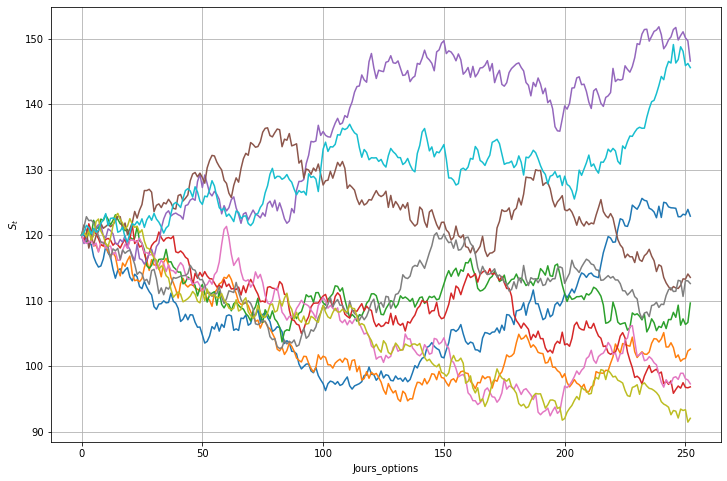

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(paths[:,0:10])
plt.grid()
ax.set_xlabel('Jours_options')
ax.set_ylabel('$S_t$')

In [24]:
PutPayoffAverage = np.average(np.maximum(0, K-paths[-1]))
PutPayoff = discount_factor * PutPayoffAverage 
print(PutPayoff)

5.29675366090175


INFLUENCE DES PARAMETRES SUR LA VALEUR DE L'OPTION

5.057698689484716


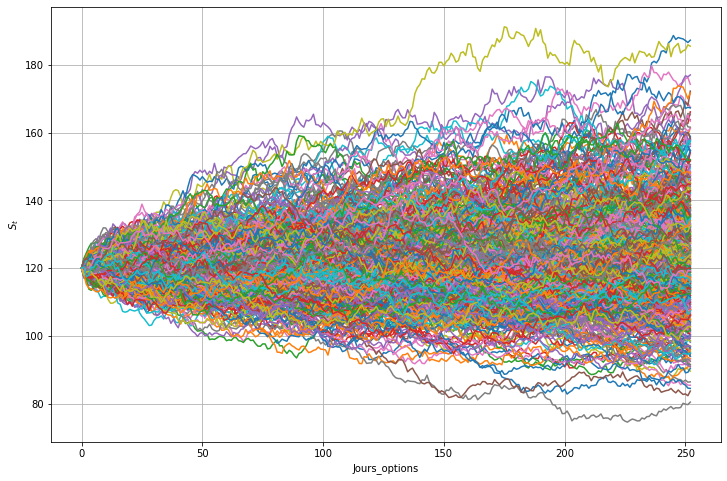

In [26]:
# Nous changeons dans cette partie les valeurs des paramètres et obtenons les résultats que nous avions stocké dans un tableau. Nous n'avons pas multiplier les codes à chaque cas.
S0 = 120
K=120
r = 0.05
sigma = 0.20
T = 0.5
N = 252
dt = T / N
j=100000
discount_factor = np.exp(-r * T)

# Mouvement brownien géométrique 
def gen_paths(S0, r, sigma, T, M, I):
    dt = float(T) / M
    paths = np.zeros((M + 1, I), np.float64)
    paths[0] = S0
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * rand)
    return paths

# Le prix du sous-jacent
paths = gen_paths(S0, r, sigma, T, N, i)
np.average(paths[-1])

# Simulation

fig, ax = plt.subplots(figsize=(12,8))
plt.plot(paths[:,0:500])
plt.grid()
ax.set_xlabel('Jours_options')
ax.set_ylabel('$S_t$')

# La valeur de l'option

PutPayoffAverage = np.average(np.maximum(0, K-paths[-1]))
PutPayoff = discount_factor * PutPayoffAverage 
print(PutPayoff)